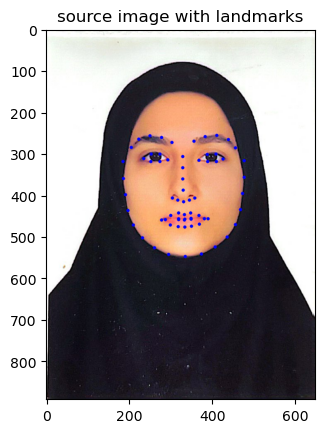

In [1]:
import cv2
import dlib
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

def imshow(title = "", image = None):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()
    
source_image= cv2.imread("C:/Users/Emelin/Desktop/images/imgtest.jpg")
source_image_grayscale=cv2.cvtColor(source_image, cv2.COLOR_BGR2GRAY)

detector = dlib.get_frontal_face_detector()
faces = detector(source_image_grayscale)

# extract specific coordinates
for face in faces:
  x1=face.left()
  y1=face.top()
  x2=face.right()
  y2=face.bottom()

pre = "shape_predictor_68_face_landmarks.dat"

predictor = dlib.shape_predictor(pre)
landmarks=predictor(source_image_grayscale, face)
points = []

x=landmarks.part(34).x
y=landmarks.part(34).y

for n in range(0,68):
    x=landmarks.part(n).x
    y=landmarks.part(n).y
    points.append((x, y))
    cv2.circle(source_image, (x, y), 4, (255, 0, 0), -1)
    face_point = np.array(points, np.int32)
    
imshow("source image with landmarks", source_image)

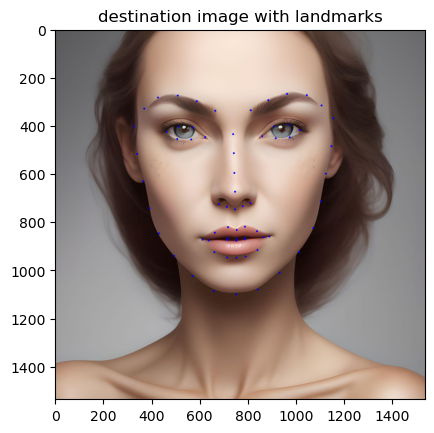

In [2]:
destination_image = cv2.imread("C:/Users/Emelin/Desktop/images/face1.jpg")
destination_image_grayscale = cv2.cvtColor(destination_image, cv2.COLOR_BGR2GRAY)

detector = dlib.get_frontal_face_detector()
faces = detector(destination_image_grayscale)

# extract specific coordinates
for face in faces:
  x1=face.left()
  y1=face.top()
  x2=face.right()
  y2=face.bottom()

pre = "shape_predictor_68_face_landmarks.dat"

predictor = dlib.shape_predictor(pre)
landmarks=predictor(destination_image_grayscale, face)
points = []

x=landmarks.part(34).x
y=landmarks.part(34).y

for n in range(0,68):
    x=landmarks.part(n).x
    y=landmarks.part(n).y
    points.append((x, y))
    cv2.circle(destination_image, (x, y), 4, (255, 0, 0), -1)
    face_point = np.array(points, np.int32)
    
imshow("destination image with landmarks", destination_image)

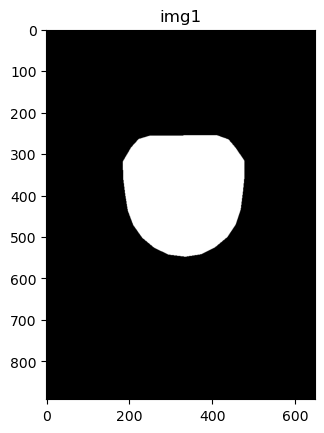

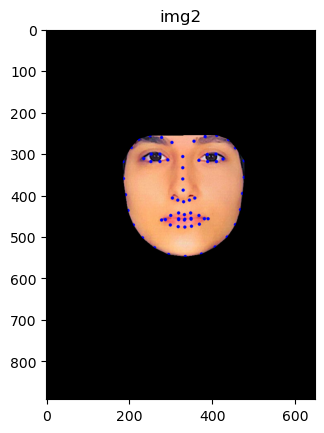

In [3]:
frontal_face_detector = dlib.get_frontal_face_detector()
frontal_face_predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

source_image_canvas = np.zeros_like(source_image_grayscale)
height, width, no_of_channels = destination_image.shape
destination_image_canvas = np.zeros((height, width, no_of_channels), np.uint8)


def index_from_array(numpyarray):
    index = None
    for n in numpyarray[0]:
        index = n
        break
    return index


source_faces = frontal_face_detector(source_image_grayscale)

# Obtaining source face landmark points, convex hull, creating mask and also getting delaunay triangle face landmark indices for every face
for source_face in source_faces:
    source_face_landmarks = frontal_face_predictor(source_image_grayscale, source_face)
    source_face_landmark_points = []
    for landmark_no in range(68):
        x_point = source_face_landmarks.part(landmark_no).x
        y_point = source_face_landmarks.part(landmark_no).y
        source_face_landmark_points.append((x_point, y_point))

    source_face_landmark_points_array = np.array(source_face_landmark_points, np.int32)
    source_face_convexhull = cv2.convexHull(source_face_landmark_points_array)
    
    cv2.fillConvexPoly(source_image_canvas, source_face_convexhull, 255)
    source_face_image = cv2.bitwise_and(source_image, source_image, mask=source_image_canvas)

imshow('img1', source_image_canvas)
imshow('img2', source_face_image)

In [ ]:
import cv2
import numpy as np
import dlib

def imshow(title = "", img = None):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

frontal_face_detector = dlib.get_frontal_face_detector()
frontal_face_predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

source_image = cv2.imread("C:/Users/Emelin/Desktop/images/imgtest.jpg")
source_image_grayscale = cv2.cvtColor(source_image, cv2.COLOR_BGR2GRAY)

destination_image = cv2.imread("C:/Users/Emelin/Desktop/images/face1.jpg")
destination_image_grayscale = cv2.cvtColor(destination_image, cv2.COLOR_BGR2GRAY)

source_image_canvas = np.zeros_like(source_image_grayscale)
height, width, no_of_channels = destination_image.shape
destination_image_canvas = np.zeros((height, width, no_of_channels), np.uint8)


def index_from_array(numpyarray):
    index = None
    for n in numpyarray[0]:
        index = n
        break
    return index


source_faces = frontal_face_detector(source_image_grayscale)

# Obtaining source face landmark points, convex hull, creating mask and also getting delaunay triangle face landmark indices for every face
for source_face in source_faces:
    source_face_landmarks = frontal_face_predictor(source_image_grayscale, source_face)
    source_face_landmark_points = []
    for landmark_no in range(68):
        x_point = source_face_landmarks.part(landmark_no).x
        y_point = source_face_landmarks.part(landmark_no).y
        source_face_landmark_points.append((x_point, y_point))

    source_face_landmark_points_array = np.array(source_face_landmark_points, np.int32)
    source_face_convexhull = cv2.convexHull(source_face_landmark_points_array)
    
    cv2.fillConvexPoly(source_image_canvas, source_face_convexhull, 255)
    source_face_image = cv2.bitwise_and(source_image, source_image, mask=source_image_canvas)

    # DELAUNAY TRIANGULATION

    bounding_rectangle = cv2.boundingRect(source_face_convexhull)
    subdivisions = cv2.Subdiv2D(bounding_rectangle)
    subdivisions.insert(source_face_landmark_points)
    triangles_vector = subdivisions.getTriangleList()
    triangles_array = np.array(triangles_vector, dtype=np.int32)

    triangle_landmark_points_list = []
    source_face_image_copy = source_face_image.copy()

    for triangle in triangles_array:
        index_point_1 = (triangle[0], triangle[1])
        index_point_2 = (triangle[2], triangle[3])
        index_point_3 = (triangle[4], triangle[5])

        index_1 = np.where((source_face_landmark_points_array == index_point_1).all(axis=1))
        index_1 = index_from_array(index_1)
        index_2 = np.where((source_face_landmark_points_array == index_point_2).all(axis=1))
        index_2 = index_from_array(index_2)
        index_3 = np.where((source_face_landmark_points_array == index_point_3).all(axis=1))
        index_3 = index_from_array(index_3)

        triangle = [index_1, index_2, index_3]
        triangle_landmark_points_list.append(triangle)


destination_faces = frontal_face_detector(destination_image_grayscale)

# Obtaining destination face landmark points and also convex hull for every face
for destination_face in destination_faces:
    destination_face_landmarks = frontal_face_predictor(destination_image_grayscale, destination_face)
    destination_face_landmark_points = []
    for landmark_no in range(68):
        x_point = destination_face_landmarks.part(landmark_no).x
        y_point = destination_face_landmarks.part(landmark_no).y
        destination_face_landmark_points.append((x_point, y_point))

    destination_face_landmark_points_array = np.array(destination_face_landmark_points, np.int32)
    destination_face_convexhull = cv2.convexHull(destination_face_landmark_points_array)

# Iterating through all source delaunay triangle and superimposing source triangles in empty destination canvas after warping to same size as destination triangles' shape
for i, triangle_index_points in enumerate(triangle_landmark_points_list):
    # Cropping source triangle's bounding rectangle

    source_triangle_point_1 = source_face_landmark_points[triangle_index_points[0]]
    source_triangle_point_2 = source_face_landmark_points[triangle_index_points[1]]
    source_triangle_point_3 = source_face_landmark_points[triangle_index_points[2]]
    source_triangle = np.array([source_triangle_point_1, source_triangle_point_2, source_triangle_point_3], np.int32)

    source_rectangle = cv2.boundingRect(source_triangle)
    (x, y, w, h) = source_rectangle
    cropped_source_rectangle = source_image[y:y+h, x:x+w]

    source_triangle_points = np.array([[source_triangle_point_1[0]-x, source_triangle_point_1[1]-y], 
                                    [source_triangle_point_2[0]-x, source_triangle_point_2[1]-y], 
                                    [source_triangle_point_3[0]-x, source_triangle_point_3[1]-y]], np.int32)


    # Create a mask using cropped destination triangle's bounding rectangle(for same landmark points as used for source triangle)

    destination_triangle_point_1 = destination_face_landmark_points[triangle_index_points[0]]
    destination_triangle_point_2 = destination_face_landmark_points[triangle_index_points[1]]
    destination_triangle_point_3 = destination_face_landmark_points[triangle_index_points[2]]
    destination_triangle = np.array([destination_triangle_point_1, destination_triangle_point_2, destination_triangle_point_3], np.int32)

    destination_rectangle = cv2.boundingRect(destination_triangle)
    (x, y, w, h) = destination_rectangle

    cropped_destination_rectangle_mask = np.zeros((h, w), np.uint8)

    destination_triangle_points = np.array([[destination_triangle_point_1[0]-x, destination_triangle_point_1[1]-y], 
                                    [destination_triangle_point_2[0]-x, destination_triangle_point_2[1]-y], 
                                    [destination_triangle_point_3[0]-x, destination_triangle_point_3[1]-y]], np.int32)

    cv2.fillConvexPoly(cropped_destination_rectangle_mask, destination_triangle_points, 255)
    
    # Warp source triangle to match shape of destination triangle and put it over destination triangle mask

    source_triangle_points = np.float32(source_triangle_points)
    destination_triangle_points = np.float32(destination_triangle_points)
    
    matrix = cv2.getAffineTransform(source_triangle_points, destination_triangle_points)
    warped_rectangle = cv2.warpAffine(cropped_source_rectangle, matrix, (w, h))

    warped_triangle = cv2.bitwise_and(warped_rectangle, warped_rectangle, mask=cropped_destination_rectangle_mask)
    
    # removing white lines in triangle using masking
    new_dest_face_canvas_area = destination_image_canvas[y:y+h, x:x+w]
    new_dest_face_canvas_area_gray = cv2.cvtColor(new_dest_face_canvas_area, cv2.COLOR_BGR2GRAY)
    _, mask_created_triangle = cv2.threshold(new_dest_face_canvas_area_gray, 1, 255, cv2.THRESH_BINARY_INV)

    warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=mask_created_triangle)
    new_dest_face_canvas_area = cv2.add(new_dest_face_canvas_area, warped_triangle)
    destination_image_canvas[y:y+h, x:x+w] = new_dest_face_canvas_area

# Put reconstructed face on the destination image
final_destination_canvas = np.zeros_like(destination_image_grayscale)
final_destination_face_mask = cv2.fillConvexPoly(final_destination_canvas, destination_face_convexhull, 255)
final_destination_canvas = cv2.bitwise_not(final_destination_face_mask)
destination_face_masked = cv2.bitwise_and(destination_image, destination_image, mask=final_destination_canvas)
destination_with_face = cv2.add(destination_face_masked, destination_image_canvas)

# Seamless cloning to make attachment blend with surrounding pixels

# we have to find center point of reconstructed convex hull to pass into seamlessClone()
(x, y, w, h) = cv2.boundingRect(destination_face_convexhull)
destination_face_center_point = (int((x+x+w)/2), int((y+y+h)/2))
seamless_cloned_face = cv2.seamlessClone(destination_with_face, destination_image, final_destination_face_mask, destination_face_center_point, cv2.NORMAL_CLONE)
cv2.imshow("Destination image with source face", seamless_cloned_face)
cv2.waitKey(0)